<h1><center><font color=green>Generación Eléctrica de las Centrales Solares en el año 2019</font></center></h1>


Se analizará la producción eléctrica de las <b>centrales solares PV a gran escala</b> (utilities) del Perú a lo largo del año 2019.
Son 7 centrales solares que se adjudicaron en las pasadas subastas RER, todas adjudicadas a diferentes precios monómicos y puestas en operación comercial en distintas fechas.

Para mayor información, revisar las siguientes fichas técnicas elaboradas por OSINERGMIN:

<b>1. Primera Subasta:</b>
    [Central Solar Majes](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.1.pdf) |
    [Central Solar Repartición](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.2.pdf) |
    [Central Solar Tacna Solar](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.3.pdf) |
    [Central Solar Panamericana Solar](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.4.pdf)

<b>2. Segunda Subasta:</b>
    [Central Solar Moquegua FV](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.5.pdf)

<b>3. Tercera Subasta:</b>
    No se adjudicaron centrales solares  
    
<b>4. Cuarta Subasta:</b>
    [Central Solar Rubí](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.6.pdf) |
    [Central Solar Intipampa](https://www.osinergmin.gob.pe/seccion/centro_documental/electricidad/Documentos/PROYECTOS%20GFE/Acorde%C3%B3n/Generaci%C3%B3n/1.6.7.pdf)



<center><img src="img/RUBI.png" alt="Central Solar Rubí" title="Rubí, la central solar más grande del Perú"/></center>

_<center><i>Fuente: [https://www.enel.pe](https://www.enel.pe/es/sostenibilidad/rubi-la-central-solar-de-enel-mas-grande-del-peru.html)</i></center>_

## 1. Data de Generación Solar PV

Fuente de la Data de Generación Solar PV en el Perú en el año 2019: http://www.coes.org.pe/Portal/mediciones/medidoresgeneracion

- La base de datos del COES solo permite descargar información hasta por un mes, por lo que necesitamos descargar 12 archivos CSV desde Enero 2019 hasta Diciembre 2019.


- Se combinaron los 12 archivos CSV para crear un único archivo de todo el año 2019: <b><i>SolarPV_PE_2019_15min.csv</i></b>.


- Los medidores registran un dato cada 15 minutos (35040 filas en un año). Para el análisis, necesitamos promediarlo y pasarlos a un dato representativo por hora (8760 filas en un año). Se pasó de tener un dato cada 15 minutos a tener un dato cada 60 minutos: <b><i>SolarPV_PE_2019_60min.csv</i></b>.

Estos archivos se pueden encontrar en la carpeta <b><i>data</i></b> dentro del repositorio: https://github.com/KevinAQM/RenewableEnergyPeru2019

Importamos los módulos necesarios para nuestro análisis.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Leyendo nuestro archivo de Generación Solar PV con resolución horaria: <b><i>SolarPV_PE_2019_60min.csv</i></b>.

In [28]:
production = pd.read_csv("data/SolarPV_PE_2019_60min.csv",
                        parse_dates=[0], index_col=0, dayfirst=1)

Visualizando las 5 primeras filas de la generación eléctrica solar PV.

In [9]:
production.head(5)

,C.S RUBI,C.S INTIPAMPA,C.S MAJES,C.S REPARTICION,C.S MOQUEGUA FV,C.S PANAMERICANA SOLAR,C.S TACNA SOLAR
FECHA,,,,,,,
2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualizando las 5 últimas filas de la generación eléctrica solar PV.

In [10]:
production.tail(5)

,C.S RUBI,C.S INTIPAMPA,C.S MAJES,C.S REPARTICION,C.S MOQUEGUA FV,C.S PANAMERICANA SOLAR,C.S TACNA SOLAR
FECHA,,,,,,,
2019-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Información general del dataframe "production".

Se observa que hay 8760 entradas (una entrada por cada hora), 7 columnas (todas las columnas son de tipo punto flotante) y no hay celdas vacías o nulas.

In [6]:
production.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 7 columns):
C.S RUBI                  8760 non-null float64
C.S INTIPAMPA             8760 non-null float64
C.S MAJES                 8760 non-null float64
C.S REPARTICION           8760 non-null float64
C.S MOQUEGUA FV           8760 non-null float64
C.S PANAMERICANA SOLAR    8760 non-null float64
C.S TACNA SOLAR           8760 non-null float64
dtypes: float64(7)
memory usage: 547.5 KB


Estadísticas básicas del dataframe "production"

In [7]:
production.describe()

,C.S RUBI,C.S INTIPAMPA,C.S MAJES,C.S REPARTICION,C.S MOQUEGUA FV,C.S PANAMERICANA SOLAR,C.S TACNA SOLAR
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,48.290364,12.064108,5.055163,4.952744,5.400194,5.856265,5.336172
std,58.130259,14.927574,6.606973,6.478136,6.490883,7.077120,7.058986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.579200,0.543300,0.136000,0.129700,0.190400,0.150450,0.030950
75%,115.306025,29.364975,10.874100,10.618025,13.049775,14.086625,13.441050
max,157.227400,40.451200,19.040000,18.926200,16.087000,18.054900,18.776400


In [27]:
production_dayly = production.rolling(window=24).mean()

In [28]:
production_monthly = production.rolling(window=720).mean()

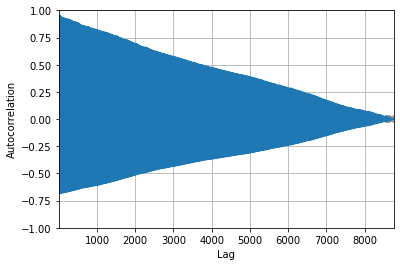

In [29]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(production['C.S RUBI'])
plt.show()

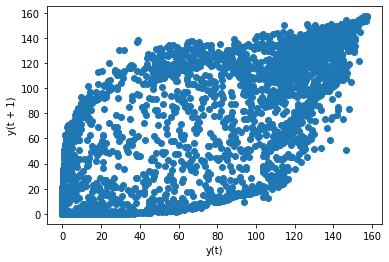

In [30]:
from pandas.plotting import lag_plot

lag_plot(production['C.S RUBI'])
plt.show()

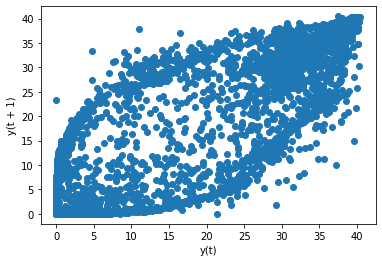

In [31]:
from pandas.plotting import lag_plot

lag_plot(production['C.S INTIPAMPA'])
plt.show()

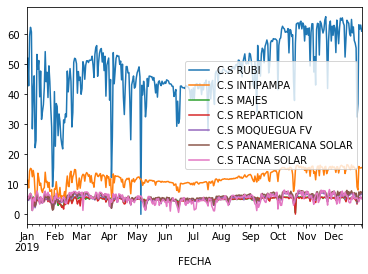

In [32]:
production.resample('D').mean().plot()

In [33]:
production.resample('M').mean()

,C.S RUBI,C.S INTIPAMPA,C.S MAJES,C.S REPARTICION,C.S MOQUEGUA FV,C.S PANAMERICANA SOLAR,C.S TACNA SOLAR
FECHA,,,,,,,
2019-01-31,41.419160,9.791670,4.926856,4.544493,4.489387,4.888415,5.587866
2019-02-28,37.795919,9.620813,4.567382,4.190073,5.275700,5.744951,6.082667
2019-03-31,50.198743,12.342860,5.413034,5.321935,5.909341,6.398206,6.355935
2019-04-30,43.571883,10.976219,4.951353,4.777952,4.785905,5.197133,5.107929
2019-05-31,42.169439,11.103257,4.795791,4.840156,4.642361,5.138746,4.483656
2019-06-30,40.955160,10.082872,4.587959,4.475943,4.545468,4.839477,3.946385
2019-07-31,42.766888,10.662793,4.703732,4.802492,4.931969,5.282364,3.919398
2019-08-31,49.296491,12.174647,5.051404,5.159728,5.629663,6.057497,5.425537
2019-09-30,52.452578,13.002130,5.350406,5.306953,5.728045,6.211280,5.329961


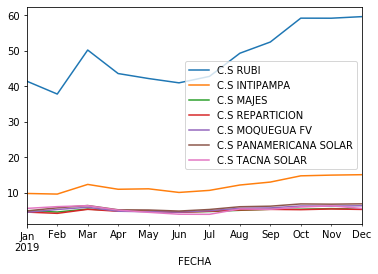

In [34]:
production.resample('M').mean().plot()

In [35]:
by_time = production.groupby(production.index.time).mean()
by_time

,C.S RUBI,C.S INTIPAMPA,C.S MAJES,C.S REPARTICION,C.S MOQUEGUA FV,C.S PANAMERICANA SOLAR,C.S TACNA SOLAR
00:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
01:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
02:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
03:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
04:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000084,0.000000
05:00:00,0.866785,0.218453,2.169973e-02,0.027269,0.032955,0.338967,0.015241
06:00:00,20.568095,4.719759,9.043847e-01,0.873072,1.305833,3.670738,1.076468
07:00:00,77.956353,18.209975,4.433378e+00,4.396019,6.418556,9.983045,4.916791
08:00:00,114.083628,29.675925,9.043093e+00,8.889590,10.699322,13.070856,8.716373
09:00:00,123.171362,32.569666,1.279506e+01,12.706500,12.699537,14.566808,12.039515


In [42]:
#df = production.groupby([production.hour, 'weekday'])['Cyclists'].sum().unstack().plot()

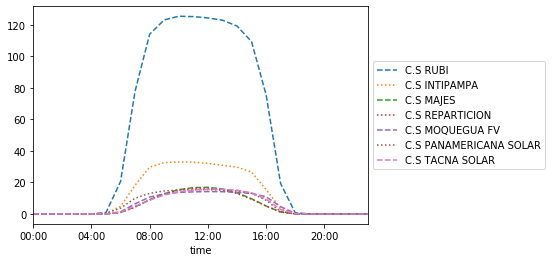

In [43]:
#https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8
by_time = production.groupby(production.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['--', ':', '--', ':', '--', ':', '--']);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [44]:
by_time

,C.S RUBI,C.S INTIPAMPA,C.S MAJES,C.S REPARTICION,C.S MOQUEGUA FV,C.S PANAMERICANA SOLAR,C.S TACNA SOLAR
00:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
01:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
02:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
03:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
04:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000084,0.000000
05:00:00,0.866785,0.218453,2.169973e-02,0.027269,0.032955,0.338967,0.015241
06:00:00,20.568095,4.719759,9.043847e-01,0.873072,1.305833,3.670738,1.076468
07:00:00,77.956353,18.209975,4.433378e+00,4.396019,6.418556,9.983045,4.916791
08:00:00,114.083628,29.675925,9.043093e+00,8.889590,10.699322,13.070856,8.716373
09:00:00,123.171362,32.569666,1.279506e+01,12.706500,12.699537,14.566808,12.039515


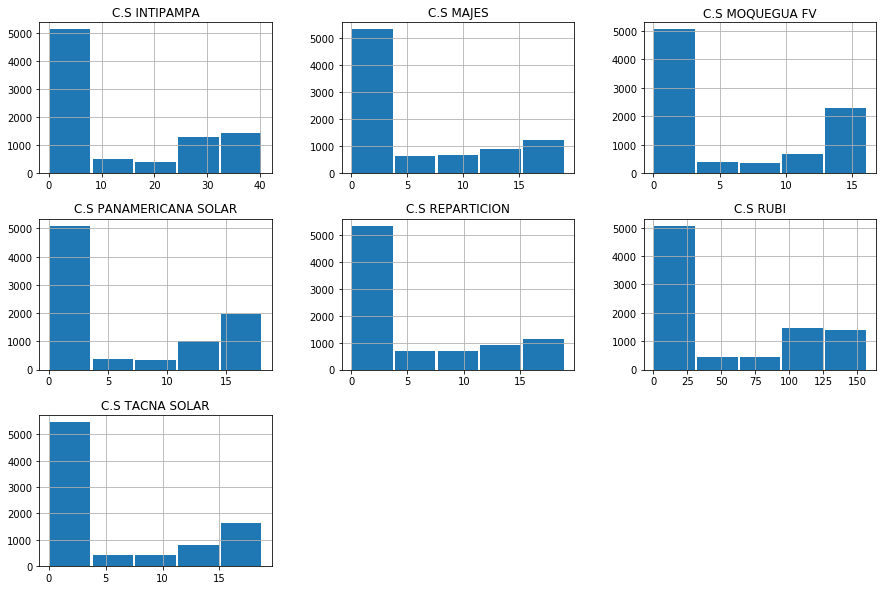

In [46]:
production.hist(bins=5, figsize=(15,10), rwidth=0.95)
plt.show()

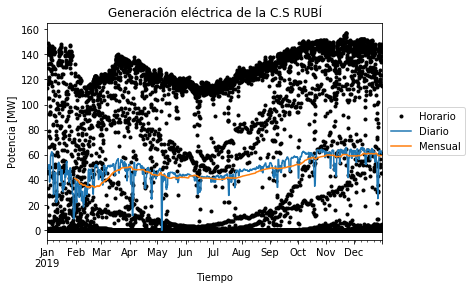

In [47]:
production['C.S RUBI'].plot(style='k.')
production_dayly['C.S RUBI'].plot()
production_monthly['C.S RUBI'].plot()
plt.title('Generación eléctrica de la C.S RUBÍ')
plt.xlabel('Tiempo')
plt.ylabel('Potencia [MW]')
plt.legend(['Horario', 'Diario', 'Mensual'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

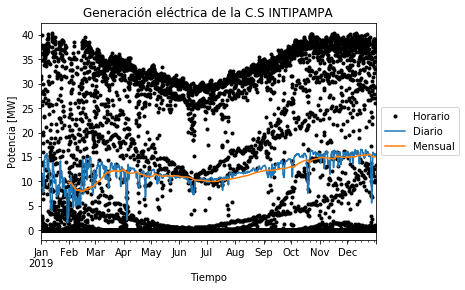

In [48]:
production['C.S INTIPAMPA'].plot(style='k.')
production_dayly['C.S INTIPAMPA'].plot()
production_monthly['C.S INTIPAMPA'].plot()
plt.title('Generación eléctrica de la C.S INTIPAMPA')
plt.xlabel('Tiempo')
plt.ylabel('Potencia [MW]')
plt.legend(['Horario', 'Diario', 'Mensual'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

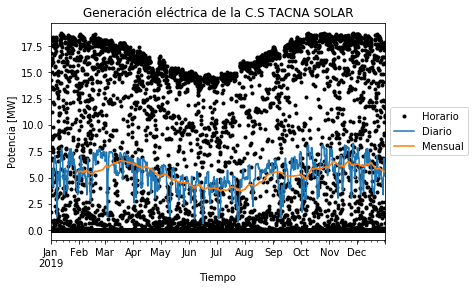

In [49]:
production['C.S TACNA SOLAR'].plot(style='k.')
production_dayly['C.S TACNA SOLAR'].plot()
production_monthly['C.S TACNA SOLAR'].plot()
plt.title('Generación eléctrica de la C.S TACNA SOLAR')
plt.xlabel('Tiempo')
plt.ylabel('Potencia [MW]')
plt.legend(['Horario', 'Diario', 'Mensual'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [50]:
#reseting dataframe --> index
production_index = production.reset_index()

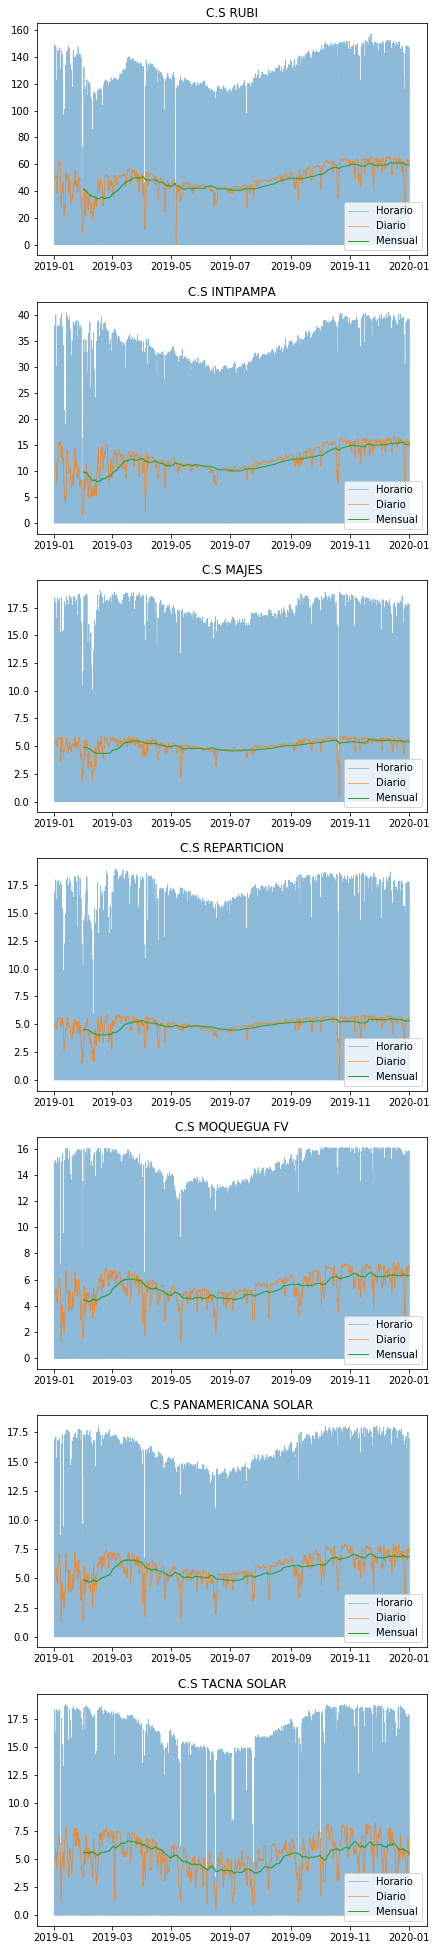

In [51]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(7,35));
axes[0].plot('FECHA', 'C.S RUBI', data=production.reset_index(), linewidth=0.8, alpha=0.5);
axes[0].plot('FECHA', 'C.S RUBI', data=production.rolling(window=24).mean().reset_index(), linewidth=0.8, alpha=0.8);
axes[0].plot('FECHA', 'C.S RUBI', data=production.rolling(window=720).mean().reset_index(), linewidth=1, alpha=1);
axes[0].legend(['Horario', 'Diario', 'Mensual'], loc='lower right')
axes[0].set_title('C.S RUBI');

axes[1].plot('FECHA', 'C.S INTIPAMPA', data=production.reset_index(), linewidth=0.8, alpha=0.5);
axes[1].plot('FECHA', 'C.S INTIPAMPA', data=production.rolling(window=24).mean().reset_index(), linewidth=0.8, alpha=0.8);
axes[1].plot('FECHA', 'C.S INTIPAMPA', data=production.rolling(window=720).mean().reset_index(), linewidth=1, alpha=1);
axes[1].legend(['Horario', 'Diario', 'Mensual'], loc='lower right')
axes[1].set_title('C.S INTIPAMPA');

axes[2].plot('FECHA', 'C.S MAJES', data=production.reset_index(), linewidth=0.8, alpha=0.5);
axes[2].plot('FECHA', 'C.S MAJES', data=production.rolling(window=24).mean().reset_index(), linewidth=0.8, alpha=0.8);
axes[2].plot('FECHA', 'C.S MAJES', data=production.rolling(window=720).mean().reset_index(), linewidth=1, alpha=1);
axes[2].legend(['Horario', 'Diario', 'Mensual'], loc='lower right')
axes[2].set_title('C.S MAJES');

axes[3].plot('FECHA', 'C.S REPARTICION', data=production.reset_index(), linewidth=0.8, alpha=0.5);
axes[3].plot('FECHA', 'C.S REPARTICION', data=production.rolling(window=24).mean().reset_index(), linewidth=0.8, alpha=0.8);
axes[3].plot('FECHA', 'C.S REPARTICION', data=production.rolling(window=720).mean().reset_index(), linewidth=1, alpha=1);
axes[3].legend(['Horario', 'Diario', 'Mensual'], loc='lower right')
axes[3].set_title('C.S REPARTICION');

axes[4].plot('FECHA', 'C.S MOQUEGUA FV', data=production.reset_index(), linewidth=0.8, alpha=0.5);
axes[4].plot('FECHA', 'C.S MOQUEGUA FV', data=production.rolling(window=24).mean().reset_index(), linewidth=0.8, alpha=0.8);
axes[4].plot('FECHA', 'C.S MOQUEGUA FV', data=production.rolling(window=720).mean().reset_index(), linewidth=1, alpha=1);
axes[4].legend(['Horario', 'Diario', 'Mensual'], loc='lower right')
axes[4].set_title('C.S MOQUEGUA FV');

axes[5].plot('FECHA', 'C.S PANAMERICANA SOLAR', data=production.reset_index(), linewidth=0.8, alpha=0.5);
axes[5].plot('FECHA', 'C.S PANAMERICANA SOLAR', data=production.rolling(window=24).mean().reset_index(), linewidth=0.8, alpha=0.8);
axes[5].plot('FECHA', 'C.S PANAMERICANA SOLAR', data=production.rolling(window=720).mean().reset_index(), linewidth=1, alpha=1);
axes[5].legend(['Horario', 'Diario', 'Mensual'], loc='lower right')
axes[5].set_title('C.S PANAMERICANA SOLAR');

axes[6].plot('FECHA', 'C.S TACNA SOLAR', data=production.reset_index(), linewidth=0.8, alpha=0.5);
axes[6].plot('FECHA', 'C.S TACNA SOLAR', data=production.rolling(window=24).mean().reset_index(), linewidth=0.8, alpha=0.8);
axes[6].plot('FECHA', 'C.S TACNA SOLAR', data=production.rolling(window=720).mean().reset_index(), linewidth=1, alpha=1);
axes[6].legend(['Horario', 'Diario', 'Mensual'], loc='lower right')
axes[6].set_title('C.S TACNA SOLAR');

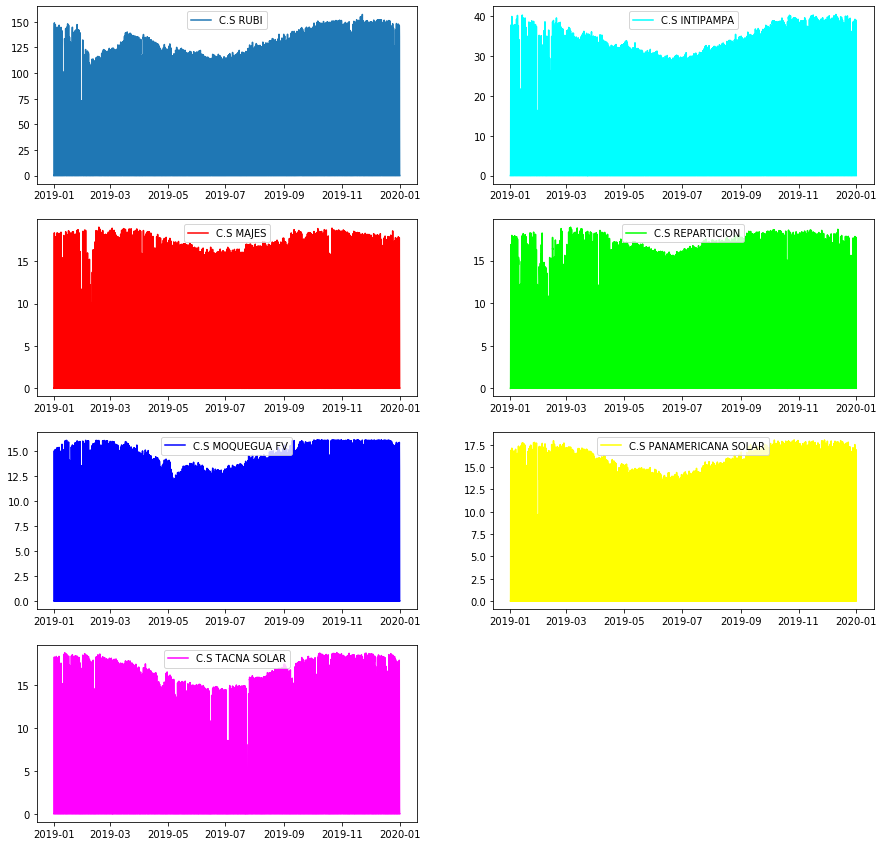

In [52]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15));
axes[0,0].plot('FECHA', 'C.S RUBI', data=production.reset_index());
axes[0,0].legend(loc='upper center')
axes[0,1].plot('FECHA', 'C.S INTIPAMPA', data=production.reset_index(), color=(0,1,1));
axes[0,1].legend(loc='upper center')
axes[1,0].plot('FECHA', 'C.S MAJES', data=production.reset_index(), color=(1,0,0));
axes[1,0].legend(loc='upper center')
axes[1,1].plot('FECHA', 'C.S REPARTICION', data=production.reset_index(), color=(0,1,0));
axes[1,1].legend(loc='upper center')
axes[2,0].plot('FECHA', 'C.S MOQUEGUA FV', data=production.reset_index(), color=(0,0,1));
axes[2,0].legend(loc='upper center')
axes[2,1].plot('FECHA', 'C.S PANAMERICANA SOLAR', data=production.reset_index(), color=(1,1,0));
axes[2,1].legend(loc='upper center')
axes[3,0].plot('FECHA', 'C.S TACNA SOLAR', data=production.reset_index(), color=(1,0,1));
axes[3,0].legend(loc='upper center')

fig.delaxes(axes[3][1])

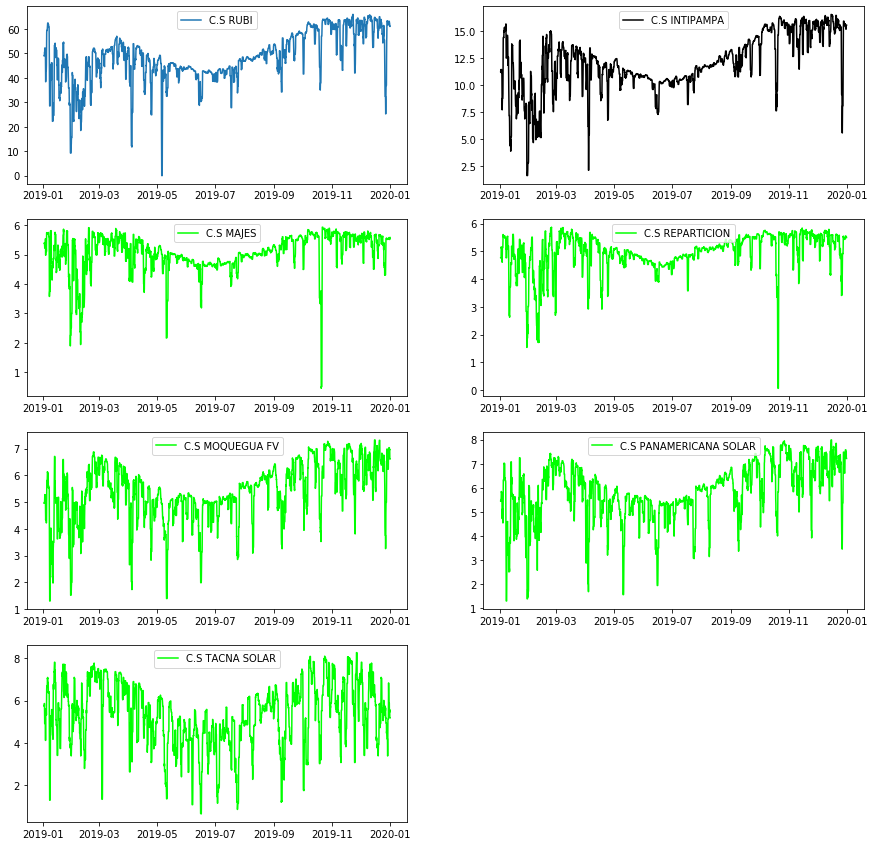

In [53]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15));
axes[0,0].plot('FECHA', 'C.S RUBI', data=production.rolling(window=24).mean().reset_index());
axes[0,0].legend(loc='upper center')
axes[0,1].plot('FECHA', 'C.S INTIPAMPA', data=production.rolling(window=24).mean().reset_index(), color=(0,0,0));
axes[0,1].legend(loc='upper center')
axes[1,0].plot('FECHA', 'C.S MAJES', data=production.rolling(window=24).mean().reset_index(), color=(0,1,0));
axes[1,0].legend(loc='upper center')
axes[1,1].plot('FECHA', 'C.S REPARTICION', data=production.rolling(window=24).mean().reset_index(), color=(0,1,0));
axes[1,1].legend(loc='upper center')
axes[2,0].plot('FECHA', 'C.S MOQUEGUA FV', data=production.rolling(window=24).mean().reset_index(), color=(0,1,0));
axes[2,0].legend(loc='upper center')
axes[2,1].plot('FECHA', 'C.S PANAMERICANA SOLAR', data=production.rolling(window=24).mean().reset_index(), color=(0,1,0));
axes[2,1].legend(loc='upper center')
axes[3,0].plot('FECHA', 'C.S TACNA SOLAR', data=production.rolling(window=24).mean().reset_index(), color=(0,1,0));
axes[3,0].legend(loc='upper center')

fig.delaxes(axes[3][1])

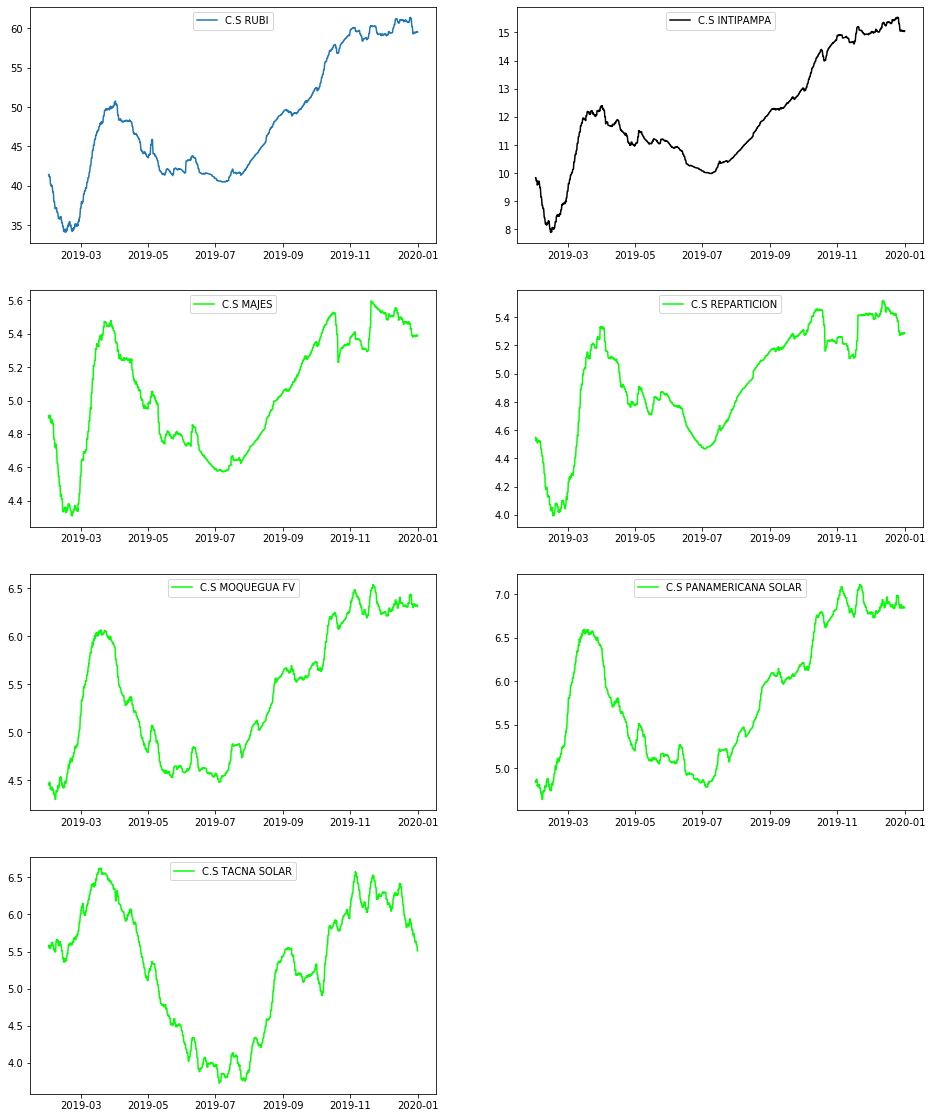

In [54]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,20));
axes[0,0].plot('FECHA', 'C.S RUBI', data=production.rolling(window=720).mean().reset_index());
axes[0,0].legend(loc='upper center')
axes[0,1].plot('FECHA', 'C.S INTIPAMPA', data=production.rolling(window=720).mean().reset_index(), color=(0,0,0));
axes[0,1].legend(loc='upper center')
axes[1,0].plot('FECHA', 'C.S MAJES', data=production.rolling(window=720).mean().reset_index(), color=(0,1,0));
axes[1,0].legend(loc='upper center')
axes[1,1].plot('FECHA', 'C.S REPARTICION', data=production.rolling(window=720).mean().reset_index(), color=(0,1,0));
axes[1,1].legend(loc='upper center')
axes[2,0].plot('FECHA', 'C.S MOQUEGUA FV', data=production.rolling(window=720).mean().reset_index(), color=(0,1,0));
axes[2,0].legend(loc='upper center')
axes[2,1].plot('FECHA', 'C.S PANAMERICANA SOLAR', data=production.rolling(window=720).mean().reset_index(), color=(0,1,0));
axes[2,1].legend(loc='upper center')
axes[3,0].plot('FECHA', 'C.S TACNA SOLAR', data=production.rolling(window=720).mean().reset_index(), color=(0,1,0));
axes[3,0].legend(loc='upper center')

fig.delaxes(axes[3][1])

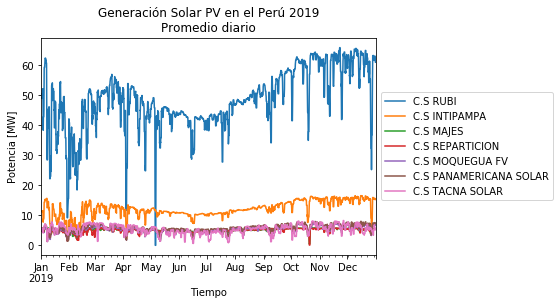

In [55]:
production.rolling(window=24).mean().plot()
plt.title('Generación Solar PV en el Perú 2019\nPromedio diario')
plt.xlabel('Tiempo')
plt.ylabel('Potencia [MW]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

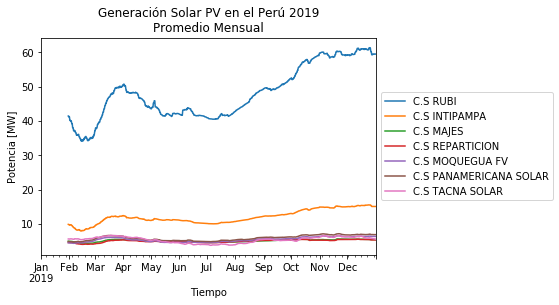

In [56]:
production.rolling(window=720).mean().plot()
plt.title('Generación Solar PV en el Perú 2019\nPromedio Mensual')
plt.xlabel('Tiempo')
plt.ylabel('Potencia [MW]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Obteniendo data por meses

In [214]:
### Weather------------------------------------------------

## 2. Data Metereológica

Obtención de data meteorológica para el año 2019: https://www1.meteocontrol.de/vcom/default/cockpit/index/systemId/1051907

Estación Meteorológica en Arequipa - Proyecto MEM - Gobierno de Canadá.

In [264]:
#Data de parámetros meteorológicos para la estación E.M.A Ocucaje, con resolución horaria
weather=pd.read_csv("data/Radiacion_Solar.csv")

In [265]:
weather.head(3)

,DateTime,Insolacion
0,01/01/2019 00:00,-5.023
1,01/01/2019 01:00,-3.801
2,01/01/2019 02:00,-2.180


In [266]:
weather.tail(3)

,DateTime,Insolacion
8013,30/11/2019 21:00,-4.000
8014,30/11/2019 22:00,-4.089
8015,30/11/2019 23:00,-4.456


In [267]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8016 entries, 0 to 8015
Data columns (total 2 columns):
DateTime      8016 non-null object
Insolacion    7650 non-null float64
dtypes: float64(1), object(1)
memory usage: 125.3+ KB


In [269]:
for i in range(0, len(weather)):
    if weather.loc[i,'Insolacion']<0:
        weather.loc[i,'Insolacion']=0
    else:
        weather.loc[i,'Insolacion']=weather.loc[i,'Insolacion']

In [270]:
weather

,DateTime,Insolacion
0,01/01/2019 00:00,0.000
1,01/01/2019 01:00,0.000
2,01/01/2019 02:00,0.000
3,01/01/2019 03:00,0.000
4,01/01/2019 04:00,0.000
5,01/01/2019 05:00,11.695
6,01/01/2019 06:00,174.896
7,01/01/2019 07:00,418.956
8,01/01/2019 08:00,645.742
9,01/01/2019 09:00,808.338


In [271]:
weather.tail(5)

,DateTime,Insolacion
8011,30/11/2019 19:00,0.0
8012,30/11/2019 20:00,0.0
8013,30/11/2019 21:00,0.0
8014,30/11/2019 22:00,0.0
8015,30/11/2019 23:00,0.0


In [272]:
weather.to_csv('Insolacion_positivo.csv', header=True, index=False)

In [273]:
Insolacion_positivo = pd.read_csv("Insolacion_positivo.csv",
                        parse_dates=[0], index_col=0, dayfirst=1)

In [274]:
Insolacion_positivo.head(3)

,Insolacion
DateTime,
2019-01-01 00:00:00,0.0
2019-01-01 01:00:00,0.0
2019-01-01 02:00:00,0.0


In [26]:
# create plot
plt.plot(Insolacion_positivo.index, Insolacion_positivo['Insolacion'])
plt.title('Ínsolación solar en Arequipa\n[W/m2]')
plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2020-01-01'))
plt.ylim(0, 1400)

NameError: name 'Insolacion_positivo' is not defined

In [277]:
### 2. Merge DataFrames

In [278]:
# merge production_wind_solar and weather_by_day DataFrames
combined = pd.merge(production, Insolacion_positivo, how='left', left_index=True, right_index=True)

In [279]:
combined.reset_index().to_csv('Combinado_positivo.csv',header=True, index=False)

In [280]:
Combinado=pd.read_csv("Combinado_positivo.csv",
                    parse_dates=[0], index_col=0, dayfirst=1)

In [281]:
Combinado.head()

,CS_RUBI,CS_INTIPAMPA,CS_MAJES,CS_REPARTICION,CS_MOQUEGUA_FV,CS_PANAMERICANA_SOLAR,CS_TACNA_SOLAR,TOTAL_MW,Insolacion
FECHA,,,,,,,,,
2019-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
Combinado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8016 entries, 2019-01-01 00:00:00 to 2019-11-30 23:00:00
Data columns (total 9 columns):
CS_RUBI                  8016 non-null float64
CS_INTIPAMPA             8016 non-null float64
CS_MAJES                 8016 non-null float64
CS_REPARTICION           8016 non-null float64
CS_MOQUEGUA_FV           8016 non-null float64
CS_PANAMERICANA_SOLAR    8016 non-null float64
CS_TACNA_SOLAR           8016 non-null float64
TOTAL_MW                 8016 non-null float64
Insolacion               7650 non-null float64
dtypes: float64(9)
memory usage: 626.2 KB


In [283]:
Combinado.dropna(how='any', inplace=True)

In [284]:
Combinado

,CS_RUBI,CS_INTIPAMPA,CS_MAJES,CS_REPARTICION,CS_MOQUEGUA_FV,CS_PANAMERICANA_SOLAR,CS_TACNA_SOLAR,TOTAL_MW,Insolacion
FECHA,,,,,,,,,
2019-01-01 00:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
2019-01-01 01:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
2019-01-01 02:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
2019-01-01 03:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
2019-01-01 04:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
2019-01-01 05:00:00,1.6852,0.7058,0.0012,0.0111,0.0332,0.9813,0.1242,3.5419,11.695
2019-01-01 06:00:00,18.5969,11.3343,1.6270,1.3477,4.2630,9.9955,3.8012,50.9658,174.896
2019-01-01 07:00:00,112.9623,28.0594,5.3434,4.8984,11.4784,13.2415,14.2995,190.2829,418.956
2019-01-01 08:00:00,128.9635,31.6185,10.0012,9.2228,13.1102,16.0840,16.8543,225.8545,645.742


In [285]:
Combinado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7650 entries, 2019-01-01 00:00:00 to 2019-11-30 23:00:00
Data columns (total 9 columns):
CS_RUBI                  7650 non-null float64
CS_INTIPAMPA             7650 non-null float64
CS_MAJES                 7650 non-null float64
CS_REPARTICION           7650 non-null float64
CS_MOQUEGUA_FV           7650 non-null float64
CS_PANAMERICANA_SOLAR    7650 non-null float64
CS_TACNA_SOLAR           7650 non-null float64
TOTAL_MW                 7650 non-null float64
Insolacion               7650 non-null float64
dtypes: float64(9)
memory usage: 597.7 KB


(0, 1500)

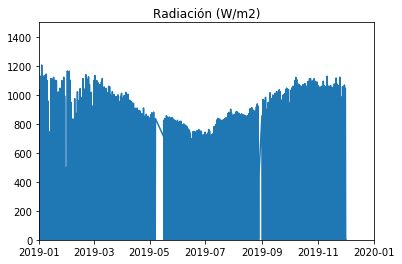

In [286]:
# create plot
plt.plot(Combinado.index, Combinado['Insolacion'])
plt.title('Radiación (W/m2)')
plt.xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2020-01-01'))
plt.ylim(0, 1500)

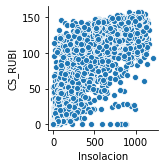

In [287]:
sns.pairplot(Combinado, x_vars=['Insolacion'], y_vars=['CS_RUBI'])

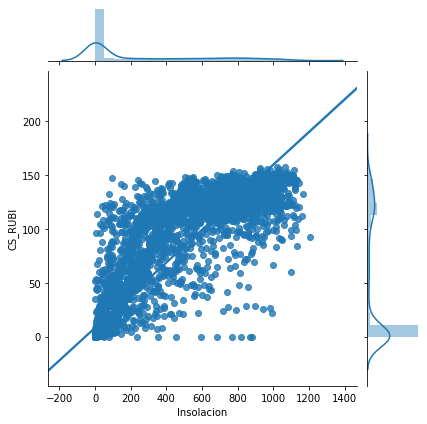

In [288]:
sns.jointplot(x='Insolacion', y='CS_RUBI', data=Combinado, kind='reg')

In [289]:
### 3. Linear regression algorithm

In [290]:
# import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# instantiate LinearRegression
lr = LinearRegression()

In [291]:
X_solar = Combinado[['Insolacion']]
y_solar = Combinado['CS_RUBI']

In [292]:
scores_solar = cross_val_score(lr, X_solar, y_solar, cv=5)
print(scores_solar, "\naverage =", np.mean(scores_solar))

[0.66926322 0.81680873 0.88766193 0.88302073 0.87731214] 
average = 0.8268133500640896


In [293]:
X_solar = Combinado[['Insolacion']]
y_solar = Combinado['TOTAL_MW']

In [294]:
scores_solar = cross_val_score(lr, X_solar, y_solar, cv=5)
print(scores_solar, "\naverage =", np.mean(scores_solar))

[0.72246415 0.86355292 0.91178995 0.91037392 0.9078154 ] 
average = 0.8631992689901582
